In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="white", palette=None)
#sns.set_theme()

# Diffusion decision model

###Able to take both options (top and bottom boundaries)
1.   **response bias** (startpoint) = 0.3 (slight preference towards to top option)
2.   **drift rate** (kappa): Gaussian distribution with mean = 1, SD = 20
3.   **noise parameter:** (sigma) SD = 0.5
4.   **boundary separation** = 2 (upper threshold = 1; lower threshold = -1)
5. **mean to regress towards** (theta): 0.8
6. **number of trials** = 1000


In [ ]:
##define model parameters
t_0 = 0 #start time
t_end = 5 #end time
length = 100 #total number of time points
trial = 1000 #number of trials

startpoint = 0.3  ###DDM: response bias
kappa = np.random.normal(loc=1,scale=20,size=(trial,length)) ###DDM: variable drift rate
sigma = 0.5   ###DDM: noise parameter
theta1 = 0.8  ###DDM: mean to regress towards (if > 0, bias towards the top option)
#theta2 = -1 #optional: for "noncompetitive" DDM

##thresholds/boundaries
upperth = 1 #upper threshold (default: 1)
lowerth = -1 #lower threshold (default: -1)

##define time axis
t = np.linspace(t_0,t_end, length)
dt = np.mean(np.diff(t)) #time bin
y = np.zeros((trial, length))
#z = np.zeros((trial, length)) #optional: for "noncompetitive" DDM

##define starting points
for u in range(0,trial):
    y[u,0] = startpoint
    #z[u,0] = startpoint

##define drift, diffusion, and Gaussian noise terms
drift = lambda y,t: (theta1-y)
diffusion = lambda y,t: sigma
noise = np.random.normal(loc=0.0,scale=1.0,size=(trial,length))*np.sqrt(dt)

##solve SDE
for u in range(0,trial):
    for i in range(1,length):
        y[u,i] = y[u,i-1] + drift(y[u,i-1],i*dt)*kappa[u,i]*dt + diffusion(y[u,i-1],i*dt)*noise[u,i]
        if y[u,i] >= upperth or y[u,i] <= lowerth:
            break

##for plotting purposes
t = np.expand_dims(t, axis=0) #add 1 to the matrix dimension
t = np.transpose(t) #transpose
y = np.transpose(y) #transpose
y[y == 0] = 'nan' #drop trailing zero values after the threshold is reached
y[0,0:trial] = startpoint #ensure first points are "startpoints"
y[y > upperth] = upperth #erase points above upper threshold
y[y < lowerth] = lowerth #erase points below lower threshold

#forpandas = np.concatenate((t,y), axis = 1) #convert to pandas dataframe
#df = pd.DataFrame(forpandas)
#df = df.rename(columns={0: 'time'})

##for statistical analysis
endtime = np.where(y == upperth)[0] #time to reach upper threshold
endtime = endtime*dt

other_endtime = np.where(y == lowerth)[0] #time to reach lower threshold
other_endtime = other_endtime*dt

#df1 = pd.DataFrame(endtime)
#df2 = pd.DataFrame(other_endtime)
#pd.concat([df1, df2])

<ipython-input-193-4a798b7373ff>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  g2=plt.subplot(312,sharex = g1)


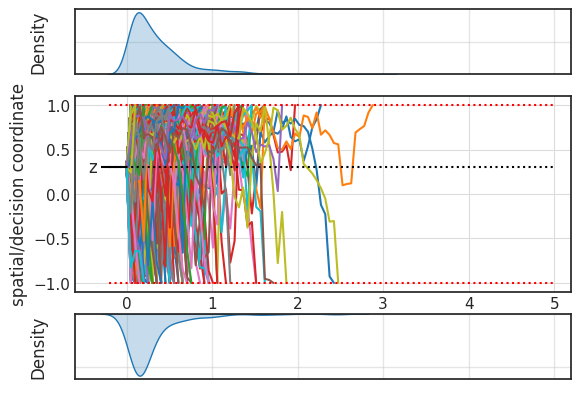

In [ ]:
#plot
if np.size(other_endtime) != 0:
  fig, axes = plt.subplots(nrows=3,gridspec_kw={'height_ratios': [1, 3, 1]})
  g1=plt.subplot(311)
  #plt.hist(endtime)
  sns.kdeplot(endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g1.tick_params(direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g1.set_xlim(-0.6,5.2)

  g2=plt.subplot(312,sharex = g1)
  plt.plot(t,y)
  plt.hlines(startpoint,t_0-0.2,t_end,colors="black",linestyles="dotted")
  plt.hlines(upperth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(lowerth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(startpoint,t_0-0.3,t_0,colors="black",linestyles="solid")
  plt.text(t_0-0.35,startpoint, 'z', ha='right', va='center')
  plt.ylabel("spatial/decision coordinate")
  plt.grid(color='gainsboro',linestyle='-', linewidth=0.8)
  g2.tick_params(direction='in')

  g3=plt.subplot(313)
  #plt.hist(other_endtime)
  sns.kdeplot(other_endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g3.set_ylim(g3.get_ylim()[::-1])
  g3.tick_params(direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g3.set_xlim(-0.6,5.2)
else: #lower boundary is not reached
  fig, axes = plt.subplots(nrows=2,gridspec_kw={'height_ratios': [1, 3]})
  g1=plt.subplot(211)
  #plt.hist(endtime)
  sns.kdeplot(endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g1.tick_params(direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g1.set_xlim(-0.6,5.2)

  g2=plt.subplot(212,sharex = g1)
  plt.plot(t,y)
  plt.hlines(startpoint,t_0-0.2,t_end,colors="black",linestyles="dotted")
  plt.hlines(upperth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(lowerth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(startpoint,t_0-0.3,t_0,colors="black",linestyles="solid")
  plt.text(t_0-0.35,startpoint, 'z', ha='right', va='center')
  plt.ylabel("spatial/decision coordinate")
  g2.tick_params(direction='in')
  plt.xlabel("time (AU)")
  plt.grid(color='gainsboro',linestyle='-', linewidth=0.8)

plt.show()

<ipython-input-194-940a4a6b9c2b>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  g2=plt.subplot(312,sharex = g1)


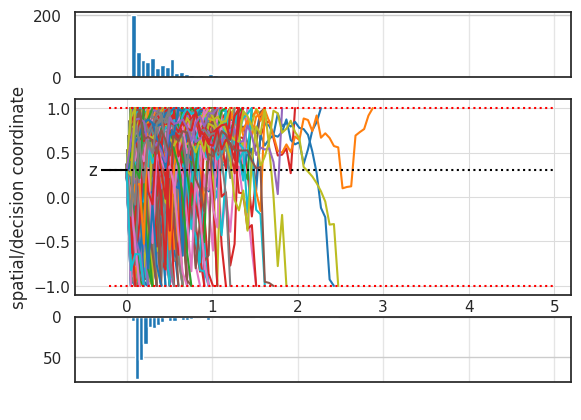

In [ ]:
#plot (histogram)
if np.size(other_endtime) != 0:
  fig, axes = plt.subplots(nrows=3,gridspec_kw={'height_ratios': [1, 3, 1]})
  g1=plt.subplot(311)
  plt.hist(endtime, bins = 50)
  #sns.kdeplot(endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g1.tick_params(axis='x', direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g1.set_xlim(-0.6,5.2)

  g2=plt.subplot(312,sharex = g1)
  plt.plot(t,y)
  plt.hlines(startpoint,t_0-0.2,t_end,colors="black",linestyles="dotted")
  plt.hlines(upperth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(lowerth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(startpoint,t_0-0.3,t_0,colors="black",linestyles="solid")
  plt.text(t_0-0.35,startpoint, 'z', ha='right', va='center')
  plt.ylabel("spatial/decision coordinate")
  plt.grid(color='gainsboro',linestyle='-', linewidth=0.8)
  g2.tick_params(direction='in')

  g3=plt.subplot(313)
  plt.hist(other_endtime, bins = 50)
  #sns.kdeplot(other_endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g3.set_ylim(g3.get_ylim()[::-1])
  g3.tick_params(axis='x', direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g3.set_xlim(-0.6,5.2)
else: #lower boundary is not reached
  fig, axes = plt.subplots(nrows=2,gridspec_kw={'height_ratios': [1, 3]})
  g1=plt.subplot(211)
  plt.hist(endtime, bins = 50)
  #sns.kdeplot(endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g1.tick_params(axis='x', direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g1.set_xlim(-0.6,5.2)

  g2=plt.subplot(212,sharex = g1)
  plt.plot(t,y)
  plt.hlines(startpoint,t_0-0.2,t_end,colors="black",linestyles="dotted")
  plt.hlines(upperth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(lowerth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(startpoint,t_0-0.3,t_0,colors="black",linestyles="solid")
  plt.text(t_0-0.35,startpoint, 'z', ha='right', va='center')
  plt.ylabel("spatial/decision coordinate")
  g2.tick_params(direction='in')
  plt.xlabel("time (AU)")
  plt.grid(color='gainsboro',linestyle='-', linewidth=0.8)

plt.show()

###Choose only the top option
1.   **response bias** (startpoint) = 0
2.   **drift rate** (kappa): Gaussian distribution with mean = 3, SD = 1
3.   **noise parameter** (sigma): SD = 0.5
4.   **boundary separation** = 2 (upper threshold = 1; lower threshold = -1)
5. **mean to regress towards** (theta): 0.9
6. **number of trials** = 100

In [ ]:
##define model parameters
t_0 = 0 #start time
t_end = 5 #end time
length = 100 #total number of time points
trial = 100 #number of trials

startpoint = 0  ###DDM: response bias
kappa = np.random.normal(loc=3,scale=1,size=(trial,length)) ###DDM: variable drift rate
sigma = 0.5   ###DDM: noise parameter
theta1 = 0.9  ###DDM: mean to regress towards (if > 0, bias towards the top option)
#theta2 = -1 #optional: for "noncompetitive" DDM

##thresholds/boundaries
upperth = 1 #upper threshold (default: 1)
lowerth = -1 #lower threshold (default: -1)

##define time axis
t = np.linspace(t_0,t_end, length)
dt = np.mean(np.diff(t)) #time bin
y = np.zeros((trial, length))
#z = np.zeros((trial, length)) #optional: for "noncompetitive" DDM

##define starting points
for u in range(0,trial):
    y[u,0] = startpoint
    #z[u,0] = startpoint

##define drift, diffusion, and Gaussian noise terms
drift = lambda y,t: (theta1-y)
diffusion = lambda y,t: sigma
noise = np.random.normal(loc=0.0,scale=1.0,size=(trial,length))*np.sqrt(dt)

##solve SDE
for u in range(0,trial):
    for i in range(1,length):
        y[u,i] = y[u,i-1] + drift(y[u,i-1],i*dt)*kappa[u,i]*dt + diffusion(y[u,i-1],i*dt)*noise[u,i]
        if y[u,i] >= upperth or y[u,i] <= lowerth:
            break

##for plotting purposes
t = np.expand_dims(t, axis=0) #add 1 to the matrix dimension
t = np.transpose(t) #transpose
y = np.transpose(y) #transpose
y[y == 0] = 'nan' #drop trailing zero values after the threshold is reached
y[0,0:trial] = startpoint #ensure first points are "startpoints"
y[y > upperth] = upperth #erase points above upper threshold
y[y < lowerth] = lowerth #erase points below lower threshold

#forpandas = np.concatenate((t,y), axis = 1) #convert to pandas dataframe
#df = pd.DataFrame(forpandas)
#df = df.rename(columns={0: 'time'})

##for statistical analysis
endtime = np.where(y == upperth)[0] #time to reach upper threshold
endtime = endtime*dt

other_endtime = np.where(y == lowerth)[0] #time to reach lower threshold
other_endtime = other_endtime*dt

#df1 = pd.DataFrame(endtime)
#df2 = pd.DataFrame(other_endtime)
#pd.concat([df1, df2])

<ipython-input-199-4a798b7373ff>:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  g2=plt.subplot(212,sharex = g1)


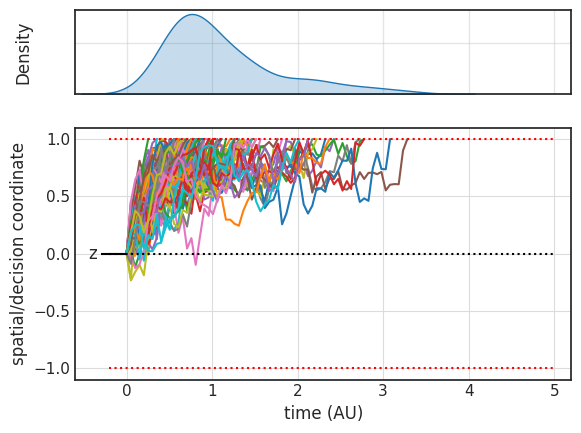

In [ ]:
#plot
if np.size(other_endtime) != 0:
  fig, axes = plt.subplots(nrows=3,gridspec_kw={'height_ratios': [1, 3, 1]})
  g1=plt.subplot(311)
  #plt.hist(endtime)
  sns.kdeplot(endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g1.tick_params(direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g1.set_xlim(-0.6,5.2)

  g2=plt.subplot(312,sharex = g1)
  plt.plot(t,y)
  plt.hlines(startpoint,t_0-0.2,t_end,colors="black",linestyles="dotted")
  plt.hlines(upperth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(lowerth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(startpoint,t_0-0.3,t_0,colors="black",linestyles="solid")
  plt.text(t_0-0.35,startpoint, 'z', ha='right', va='center')
  plt.ylabel("spatial/decision coordinate")
  plt.grid(color='gainsboro',linestyle='-', linewidth=0.8)
  g2.tick_params(direction='in')

  g3=plt.subplot(313)
  #plt.hist(other_endtime)
  sns.kdeplot(other_endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g3.set_ylim(g3.get_ylim()[::-1])
  g3.tick_params(direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g3.set_xlim(-0.6,5.2)
else: #lower boundary is not reached
  fig, axes = plt.subplots(nrows=2,gridspec_kw={'height_ratios': [1, 3]})
  g1=plt.subplot(211)
  #plt.hist(endtime)
  sns.kdeplot(endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g1.tick_params(direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g1.set_xlim(-0.6,5.2)

  g2=plt.subplot(212,sharex = g1)
  plt.plot(t,y)
  plt.hlines(startpoint,t_0-0.2,t_end,colors="black",linestyles="dotted")
  plt.hlines(upperth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(lowerth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(startpoint,t_0-0.3,t_0,colors="black",linestyles="solid")
  plt.text(t_0-0.35,startpoint, 'z', ha='right', va='center')
  plt.ylabel("spatial/decision coordinate")
  g2.tick_params(direction='in')
  plt.xlabel("time (AU)")
  plt.grid(color='gainsboro',linestyle='-', linewidth=0.8)

plt.show()

<ipython-input-200-940a4a6b9c2b>:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  g2=plt.subplot(212,sharex = g1)


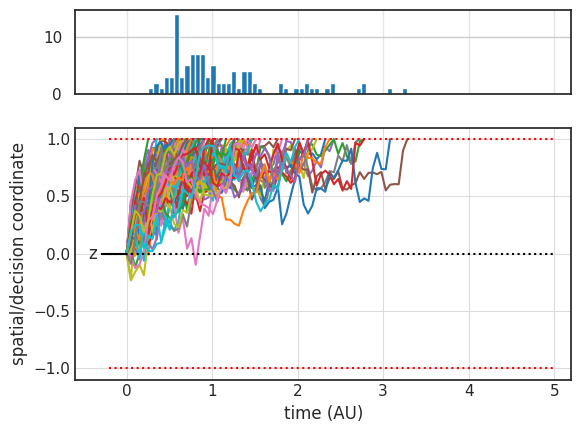

In [ ]:
#plot (histogram)
if np.size(other_endtime) != 0:
  fig, axes = plt.subplots(nrows=3,gridspec_kw={'height_ratios': [1, 3, 1]})
  g1=plt.subplot(311)
  plt.hist(endtime, bins = 50)
  #sns.kdeplot(endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g1.tick_params(axis='x', direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g1.set_xlim(-0.6,5.2)

  g2=plt.subplot(312,sharex = g1)
  plt.plot(t,y)
  plt.hlines(startpoint,t_0-0.2,t_end,colors="black",linestyles="dotted")
  plt.hlines(upperth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(lowerth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(startpoint,t_0-0.3,t_0,colors="black",linestyles="solid")
  plt.text(t_0-0.35,startpoint, 'z', ha='right', va='center')
  plt.ylabel("spatial/decision coordinate")
  plt.grid(color='gainsboro',linestyle='-', linewidth=0.8)
  g2.tick_params(direction='in')

  g3=plt.subplot(313)
  plt.hist(other_endtime, bins = 50)
  #sns.kdeplot(other_endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g3.set_ylim(g3.get_ylim()[::-1])
  g3.tick_params(axis='x', direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g3.set_xlim(-0.6,5.2)
else: #lower boundary is not reached
  fig, axes = plt.subplots(nrows=2,gridspec_kw={'height_ratios': [1, 3]})
  g1=plt.subplot(211)
  plt.hist(endtime, bins = 50)
  #sns.kdeplot(endtime, fill=True) #color='blue'
  #plt.axis('off')
  plt.grid(visible=None)
  g1.tick_params(axis='x', direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
  g1.set_xlim(-0.6,5.2)

  g2=plt.subplot(212,sharex = g1)
  plt.plot(t,y)
  plt.hlines(startpoint,t_0-0.2,t_end,colors="black",linestyles="dotted")
  plt.hlines(upperth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(lowerth,t_0-0.2,t_end,colors="red",linestyles="dotted")
  plt.hlines(startpoint,t_0-0.3,t_0,colors="black",linestyles="solid")
  plt.text(t_0-0.35,startpoint, 'z', ha='right', va='center')
  plt.ylabel("spatial/decision coordinate")
  g2.tick_params(direction='in')
  plt.xlabel("time (AU)")
  plt.grid(color='gainsboro',linestyle='-', linewidth=0.8)

plt.show()

<ipython-input-2-0a8aae0b967f>:102: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  g2=plt.subplot(212,sharex = g1)


1

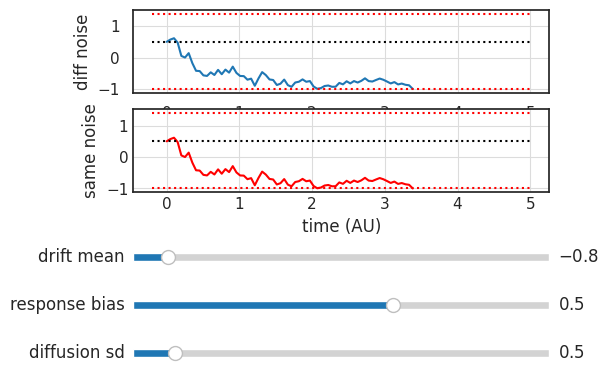

In [ ]:
##interactive
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

import pandas as pd
import seaborn as sns
sns.set_theme(style="white", palette=None)
#sns.set_theme()


##define model parameters
t_0 = 0 #start time
t_end = 5 #end time
length = 100 #total number of time points
trial = 1 #number of trials

startpoint = 0.5  ###DDM: response bias
theta1 = -0.8 ###DDM: mean to regress towards (if > 0, bias towards the top option)
#theta2 = -1 #optional: for "noncompetitive" DDM
sigma = 0.5   ###DDM: noise parameter
k_mean = 1
k_sd = 1
kappa = np.random.normal(loc=k_mean,scale=k_sd,size=(trial,length)) ###DDM: variable drift rate

##thresholds/boundaries
upperth = 1.4 #upper threshold (default: 1)
lowerth = -1.0 #lower threshold (default: -1)

##define time axis
t = np.linspace(t_0,t_end, length)
dt = np.mean(np.diff(t)) #time bin
y = np.zeros((trial, length))
#z = np.zeros((trial, length)) #optional: for "noncompetitive" DDM

##define starting points
for u in range(0,trial):
    y[u,0] = startpoint
    #z[u,0] = startpoint

##define drift, diffusion, and Gaussian noise terms
drift = lambda y,t: (theta1-y)
diffusion = lambda y,t: sigma
noise = np.random.normal(loc=0.0,scale=1.0,size=(trial,length))*np.sqrt(dt)

##solve SDE
for u in range(0,trial):
    for i in range(1,length):
        y[u,i] = y[u,i-1] + drift(y[u,i-1],i*dt)*kappa[u,i]*dt + diffusion(y[u,i-1],i*dt)*noise[u,i]
        if y[u,i] >= upperth or y[u,i] <= lowerth:
            break
##for plotting purposes
t = np.expand_dims(t, axis=0) #add 1 to the matrix dimension
t = np.transpose(t) #transpose
y = np.transpose(y) #transpose
y[y == 0] = 'nan' #drop trailing zero values after the threshold is reached
y[0,0:trial] = startpoint #ensure first points are "startpoints"
y[y > upperth] = upperth #erase points above upper threshold
y[y < lowerth] = lowerth #erase points below lower threshold

##for statistical analysis
endtime = np.where(y == upperth)[0] #time to reach upper threshold
endtime = endtime*dt

other_endtime = np.where(y == lowerth)[0] #time to reach lower threshold
other_endtime = other_endtime*dt

##########################

fig, axes = plt.subplots(nrows=2,gridspec_kw={'height_ratios': [1, 1]})
plt.subplots_adjust(left=0.25, bottom=0.5)
# g1=plt.subplot(211)
# #plt.hist(endtime)
# sns.kdeplot(endtime, fill=True) #color='blue'
# #plt.axis('off')
# plt.grid(visible=None)
# g1.tick_params(axis='x', direction='out', length=6, width=2, colors='w', grid_alpha=0.5)
# g1.set_xlim(-0.6,5.2)

g1=plt.subplot(211)
l2,=plt.plot(t,y)
plt.hlines(startpoint,t_0-0.2,t_end,colors="black",linestyles="dotted")
top_init = plt.hlines(upperth,t_0-0.2,t_end,colors="red",linestyles="dotted")
bottom_init = plt.hlines(lowerth,t_0-0.2,t_end,colors="red",linestyles="dotted")
#hvar = plt.hlines(startpoint,t_0-0.3,t_0,colors="black",linestyles="solid")
#plt.text(t_0-0.35,startpoint, 'init', ha='right', va='center')
plt.ylabel("diff noise")
#plt.grid(visible=None)
#plt.tick_params(visible=None)
plt.xlabel("time (AU)")
plt.grid(color='gainsboro',linestyle='-', linewidth=0.8)

g2=plt.subplot(212,sharex = g1)
l,=plt.plot(t,y,color="red")
plt.hlines(startpoint,t_0-0.2,t_end,colors="black",linestyles="dotted")
top_init = plt.hlines(upperth,t_0-0.2,t_end,colors="red",linestyles="dotted")
bottom_init = plt.hlines(lowerth,t_0-0.2,t_end,colors="red",linestyles="dotted")
#hvar = plt.hlines(startpoint,t_0-0.3,t_0,colors="black",linestyles="solid")
#plt.text(t_0-0.35,startpoint, 'init', ha='right', va='center')
plt.ylabel("same noise")
g2.tick_params(direction='in')
plt.xlabel("time (AU)")
plt.grid(color='gainsboro',linestyle='-', linewidth=0.8)

axcolor = 'lightgoldenrodyellow'

axtheta = plt.axes([0.25, 0.35, 0.65, 0.03], facecolor=axcolor)
axstart = plt.axes([0.25, 0.25, 0.65, 0.03], facecolor=axcolor)
axsigma = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

s_theta = Slider(axtheta,'drift mean', lowerth, upperth, valinit=theta1)
s_start = Slider(axstart,'response bias', lowerth, upperth, valinit=startpoint)
s_sigma = Slider(axsigma,'diffusion sd', 0, 5, valinit=sigma)

y2 = np.zeros((trial, length))
y3 = np.zeros((trial, length))

def update(val):

    n_theta = s_theta.val
    n_start = s_start.val
    n_sigma = s_sigma.val

    #t = np.linspace(t_0,t_end, length)
    for u in range(0,trial):
        y2[u,0] = n_start

    #noise2 = np.random.normal(loc=0.0,scale=1.0,size=(trial,length))*np.sqrt(dt)
    drift = lambda y,t: (n_theta-y)
    #diffusion = lambda y,t: n_sigma

    for i in range(1,length):
        y2[u,i] = y2[u,i-1] + drift(y2[u,i-1],i*dt)*kappa[u,i]*dt + n_sigma*noise[u,i]
        if y2[u,i] >= upperth or y2[u,i] <= lowerth:
            break

    # t = np.expand_dims(t, axis=0) #add 1 to the matrix dimension
    # t = np.transpose(t) #transpose
    # y2 = np.transpose(y2) #transpose
    # y2[y2 == 0] = 'nan' #drop trailing zero values after the threshold is reached
    # y2[0,0:trial] = startpoint #ensure first points are "startpoints"
    # y2[y2 > upperth] = upperth #erase points above upper threshold
    # y2[y2 < lowerth] = lowerth #erase points below lower threshold

    # hvar2.remove()
    # hvar2 = g2.hlines(n_start,t_0-0.3,t_0,colors="black",linestyles="solid")
    # textvar = g2.text(t_0-0.35,n_start, 'z', ha='right', va='center')

    l.set_ydata(y2)

    l.canvas.draw_idle()

def update_varnoise(val):

    n_theta = s_theta.val
    n_start = s_start.val
    n_sigma = s_sigma.val

    #t = np.linspace(t_0,t_end, length)
    for u in range(0,trial):
        y3[u,0] = n_start

    varnoise = np.random.normal(loc=0.0,scale=1.0,size=(trial,length))*np.sqrt(dt)
    drift = lambda y,t: (n_theta-y)
    #diffusion = lambda y,t: n_sigma

    for i in range(1,length):
        y3[u,i] = y3[u,i-1] + drift(y3[u,i-1],i*dt)*kappa[u,i]*dt + n_sigma*varnoise[u,i]
        if y3[u,i] >= upperth or y3[u,i] <= lowerth:
            break

    # t = np.expand_dims(t, axis=0) #add 1 to the matrix dimension
    # t = np.transpose(t) #transpose
    # y2 = np.transpose(y2) #transpose
    # y2[y2 == 0] = 'nan' #drop trailing zero values after the threshold is reached
    # y2[0,0:trial] = startpoint #ensure first points are "startpoints"
    # y2[y2 > upperth] = upperth #erase points above upper threshold
    # y2[y2 < lowerth] = lowerth #erase points below lower threshold

    # hvar2.remove()
    # hvar2 = g2.hlines(n_start,t_0-0.3,t_0,colors="black",linestyles="solid")
    # textvar = g2.text(t_0-0.35,n_start, 'z', ha='right', va='center')

    l2.set_ydata(y3)

    l2.canvas.draw_idle()

s_theta.on_changed(update)
s_start.on_changed(update)
s_sigma.on_changed(update)

s_theta.on_changed(update_varnoise)
s_start.on_changed(update_varnoise)
s_sigma.on_changed(update_varnoise)

